# 1.0 Soluciones de las ecuaciones de una variable

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/caramirezs/MetNum_POLI/blob/libro/1_Ecuaciones_de_una_variable/1.0_Soluciones_ecuaciones_una_variable.ipynb)

In [1]:
# Librerias iniciales
# EJECUTAR ESTA CELDA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Funciones en python

In [2]:
# Funciones iniciales
# EJECUTAR ESTA CELDA
def graficar(f, x_i, x_f, num = 1000):
    plt.style.use('seaborn')
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20,8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

## Marco Teórico: Introducción a ecuaciones de una variable

Antes de ahondar en el ejercicio de solucionar ecuaciones de una variable, recordemos como en los cursos de matemáticas fundamentales se solucionan algunas ecuaciones sencillas, por ejemplo, pensemos en la ecuación cuadrática de la forma clásica:

$$ax^2 + bx + c = 0$$

que se puede resolver con la forma:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

A los valores de la solución de la ecuación se les llama "raíces" o "cortes" de la función cuadrática $f(x) = ax^2 + bx + c$. Para este escenario en particular encontrar las $x$ en donde $f(x) = 0$ es sencillo.

> Recuerda: Encontrar raices o ceros de las funciones es parte fundamental en la practica del desarrollo de actividades relacionadas con ciencia e ingenieria.

Seguramente nos hemos encontrado con otras ecuaciones las cuales se conocen procesos algebraicos para solucionarlas, entre ellas pueden estar las ecuaciones lineales, exponenciales, trigonométricas, entre otras.

Ahora pensemos en ecuaciones que no se pueden resolver facilmente, por ejemplo aquellas que involucran funciones polinómicas:

$$f(x) = a_n x^n + a_{n-1}x^{n-1} + ... + a_1x + a_0$$

aquí, cuando el $n>2$, solucionar la ecuación $f(x) = 0$ para encontrar valores de $x$ sería muy complejo y no siempre se tienen proceso algebraicos para hacerlo.

En general, muchos modelos dan como resultados ecuaciones cuyas soluciones no son sencillas de determinar, o simplemente no se pueden encontrar de manera analítica.

Es aquí donde algunos _métodos númericos_ vienen al rescate para encontrar las posibles soluciones a ecuaciones de una variable.

> Observación: En adelante, para resolver una ecuación es *necesario* que este igualada a cero, es decir, de la forma $f(x) = 0$, lo cual equivale a encontrar los ceros de $f(x)$.

> Ejemplo: Encotrar las soluciones de la ecuación $\cos(x^2) - 3x = \sin^2(x) -2x^2$ es lo mismo que solucionar la ecuación $\cos(x^2) - 3x - \sin^2(x) + 2x^2 = 0$, de tal manera que $f(x) = \cos(x^2) - 3x - \sin^2(x) + 2x^2 = 0$

Existen diferente métodos que se aplican a diferentes tipos de ecuaciones, y algunos métodos pueden resolver más de un tipo de ecuación. A continuación enumeramos los que vamos a estudiar en este curso.

### Tipos de Métodos
* *Métodos cerrados:* Estos métodos aprovechan el hecho de que una función contínua cambia de signo cerca de su raíz, para utilizarlos se necesita un intervalo cerrado en el cual está la raíz que se desa hallar. Se destacan:
    * *Método gráfico*
    * *Método de bisección*
    * *Método _regula falsi_*
* *Métodos abiertos:* diseñado para encontrar una raiz a partir de un valor dado arbitario, podrían encontrar más de una raíz. Se destacan:
    * *Método de Newton-Raphson*
    * *Método de la secante*
    * *Método de punto fijo*


## Método gráfico

Este método consiste en graficar una función $f(x)$ sobre un intervalo $[a,b]$ y observar dónde cruza el $eje-x$. El valor de $x$ en el corte de la función con el eje representa una solución aproximada de la ecuación $f(x) = 0$.

Las técnicas gráficas tienen un valor práctico limitado, ya que no son precisas. Sin embargo, se pueden utilizar para obtener aproximaciones de la raíz y luego utilizar un método más preciso. En otras palabras, dichas aproximaciones se pueden usar como valores iniciales de los otros métodos numéricos los cuales analizaremos más adelante.

La función del apartado de arriba (funciones en python >> _graficar_) realiza la gráfica de una función $f$ sobre un intervalo $[x_i, x_f]$.

El método gráfico es un procedimiento para resolver problemas de programación lineal, muy limitado en cuanto al número de variables (2 si es un gráfico 2D y 3 si es 3D) pero muy rico en cuanto a la interpretación de los resultados e incluso el análisis de sensibilidad. Consiste en representar cada una de las restricciones y encontrar en la medida de lo posible el polígono factible (poliedro), comúnmente llamado conjunto de soluciones o región factible, en el que por razones trigonométricas en uno de sus vértices es la mejor respuesta (solución óptima).

## Pasos para resolver un sistema de ecuaciones por el método gráfico

Para resolver un sistema de ecuaciones mediante el método gráfico se realizan los siguientes pasos:

* Despeja incógnitas en ambas ecuaciones.
* Construye la tabla de valores correspondientes para cada una de las dos funciones de primer grado obtenidas.
* Representar gráficamente en los ejes de coordenadas.

Como vamos a trabajar con sistemas de dos ecuaciones lineales con dos incógnitas (x e y), el gráfico de cada ecuación es una línea. Como resultado, la intersección de las gráficas es un solo punto (a, b) y la solución del sistema es $x = a$ y $y = b$. Sin embargo, si las líneas son paralelas (no cortadas), el sistema no tiene solución, y si son iguales hay infinitas soluciones.

### Ejemplo de un sistema de ecuaciones resuelto por el método gráfico

\begin{align*}
y - 2x = 0  \\
y + x = 3
\end{align*}


### Solución 

Lo primero que hacemos es aclarar la y en ambas ecuaciones.

Primera ecuación:

\begin{align*}
y - 2x = 0   \\
y = 2x
\end{align*}

Segunda ecuación:


\begin{align*}
y + x = 3  \to \\
y = 3 -x
\end{align*}

Ahora vamos a calcular algunos puntos de las dos funciones para representarlas. Usamos, por ejemplo, $x = 0 y x = 2$.

Para la primera función tenemos la tabla



|x|y = 2x|Punto|
|----|---|----|
|0|0|(0,0)|
|2|4|(2,4)|


Para la segunda función tenemos la tabla (usando los mismos valores para $x$):

|x|y = 3 -x|Punto|
|----|---|----|
|0|3|(0,3)|
|2|1|(2,1)|

Representamos los puntos de la tabla y los unimos:


**Graficamente de puede interpretar el métdo de Newton-Raphson**

<img src="imagenes/mgrafico.png"/>

*Imagen sacada de [https://solonumeros.win/metodo-grafico/]*

### Ejemplo 1
Encontrar las soluciones de la ecuación $e^x - 3 \sin(x) = 3x$ con el método gráfico.

#### Solución
Lo primero que se debe hacer es igualar a cero y definir la función: $f(x) = e^x - 3 \sin(x) - 3x$. 
Luego construimos la función en Python, podemos hacerlo utilizando con la expresión `lamnda` y con la librería `numpy`.

> Observación: Al incio de este cuaderno declaramos que íbamos a utilizar la librería numpy, mediante el comando `import numpy as np`

Finalmente, escogemos un intervalo y graficamos. El intervalo seleccionado es $[-0.2, 2.5]$.

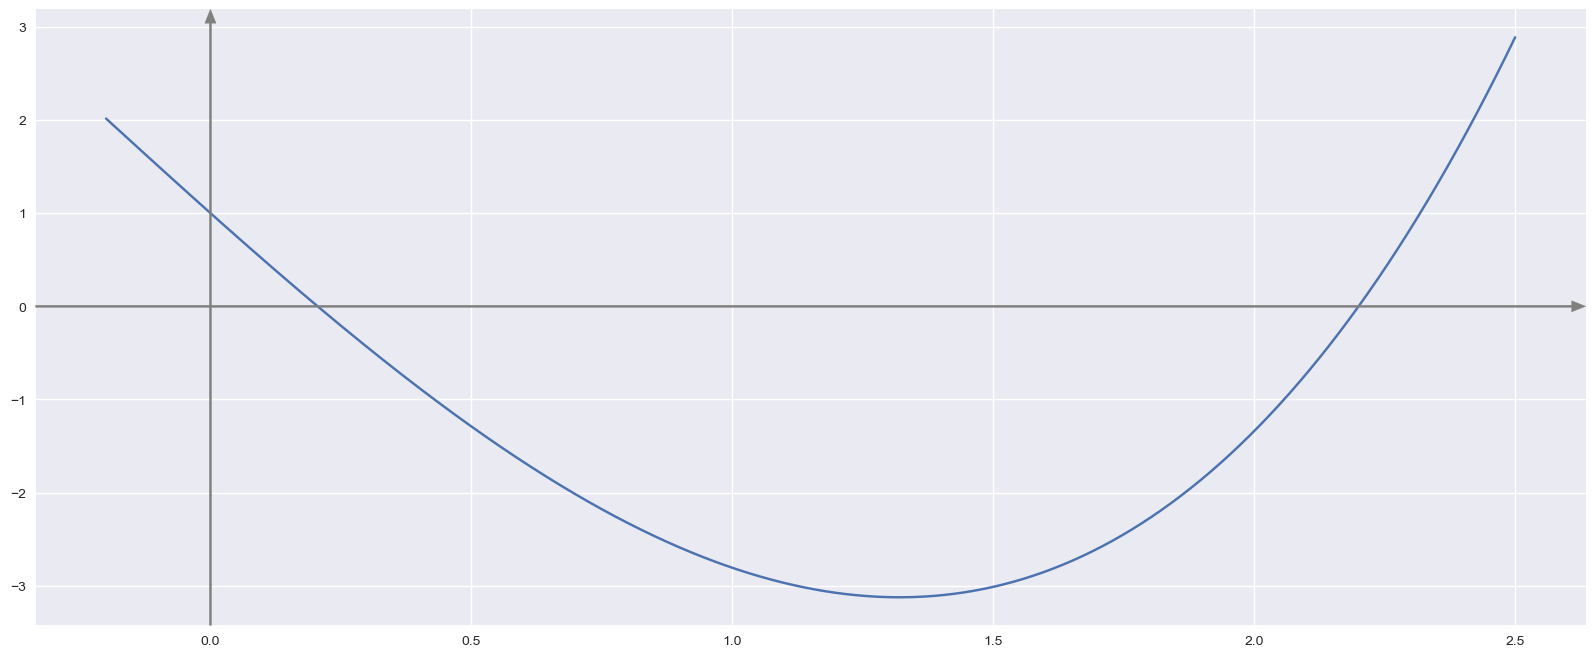

In [3]:
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
graficar(f, -0.2, 2.5)

En la gráfica anterior podemos identificar dos raíces de la función $f(x)$, en otras palabras, en el intervlalo $[-0.2, 2.5]$ hay dos soluciones de la ecuación $e^x - 3 \sin(x) = 3x$.

Notemos que este método no nos permite realmente identificar las soluciones de la función, sino darnos una idea de donde están y tener una *imprecisa* aproximación de estas.

In [4]:
### Conclusiones - importancia de los otros métodos